In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset 
data = pd.read_csv("heart.csv")  
data.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.shape


(1025, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
#EDA
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data['cp']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    0
1024    0
Name: cp, Length: 1025, dtype: int64

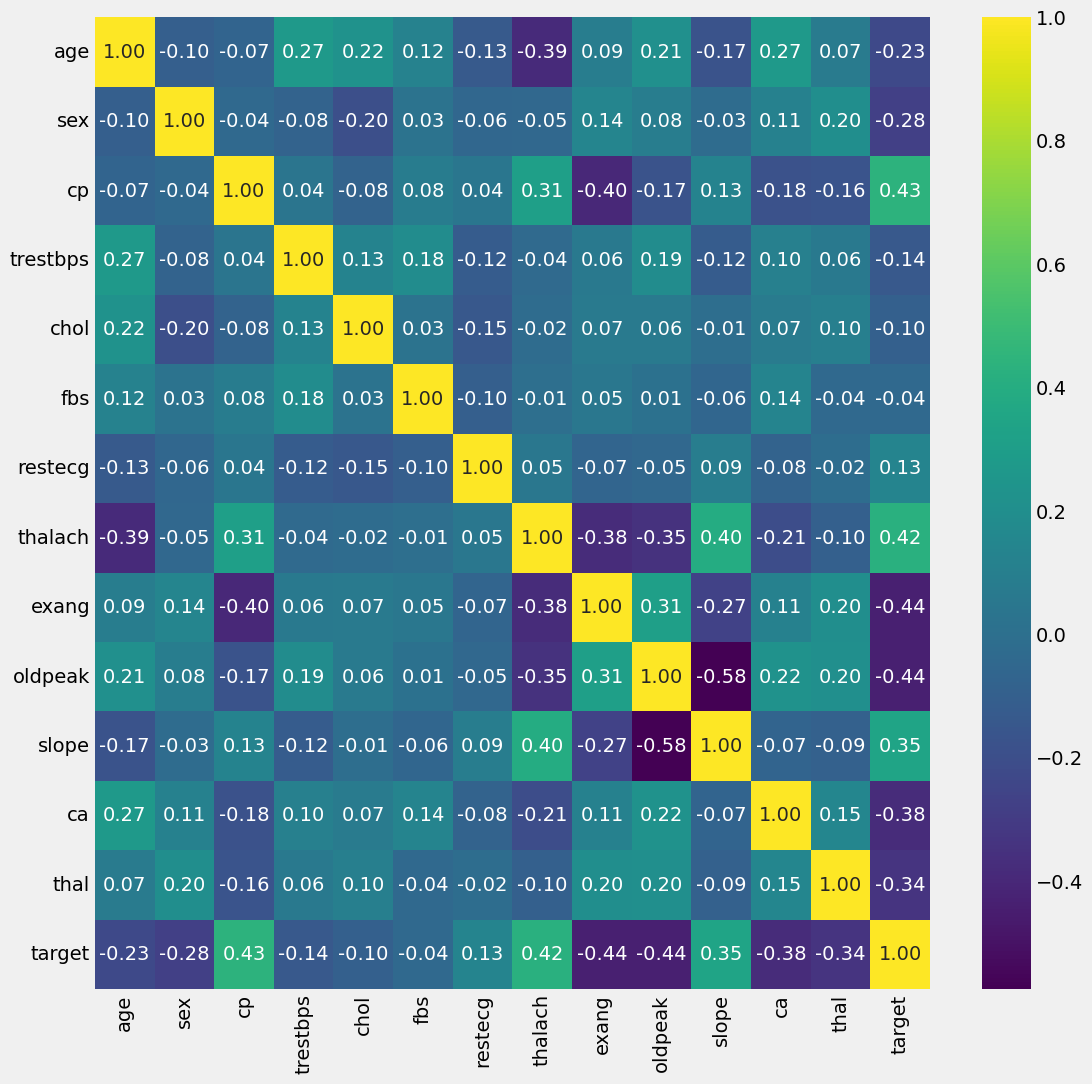

In [9]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [14]:
#Clculate age
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 29 max = 77 mean = 54.43414634146342


In [28]:
#Prepare ages for a bie chart
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Old = data[(data.age>55)]

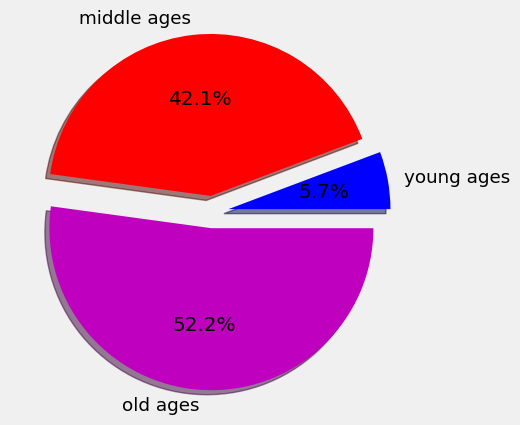

In [29]:
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

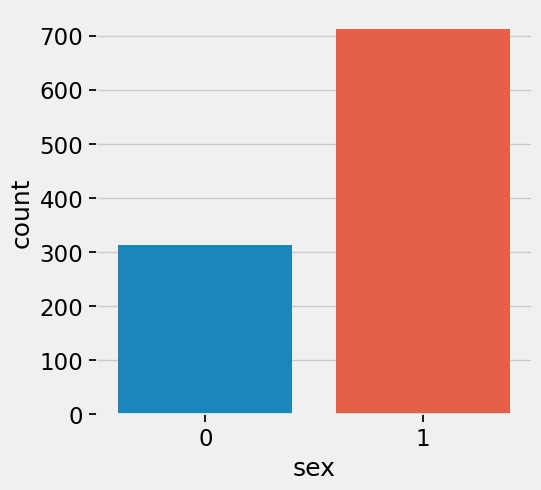

In [55]:
#Sex 
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=data)
plt.show()

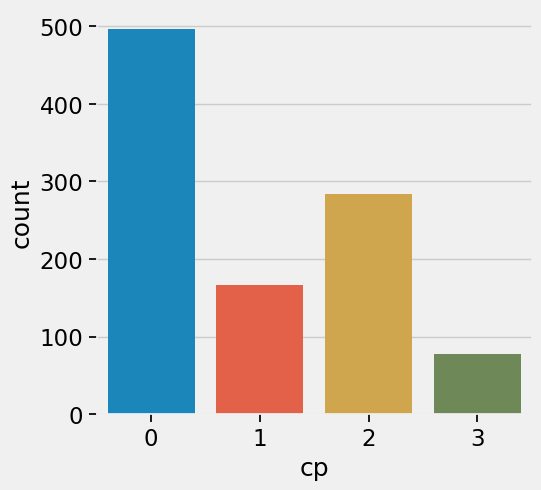

In [56]:
#chest 
plt.figure(figsize=(5,5))
sns.countplot(x='cp', data=data)
plt.show()

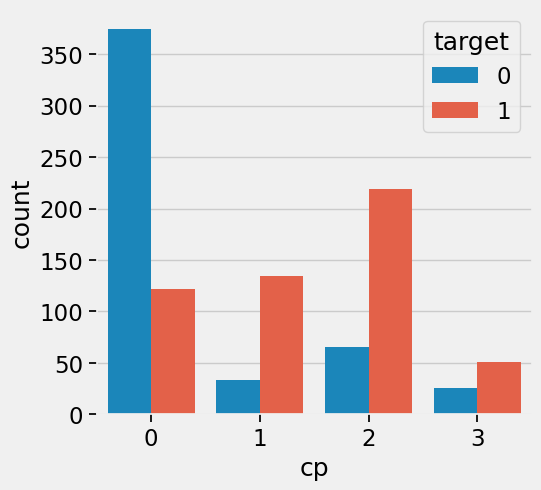

In [57]:
#Chest with Heart 
plt.figure(figsize=(5,5))
sns.countplot(x='cp', data=data , hue='target')
plt.show()

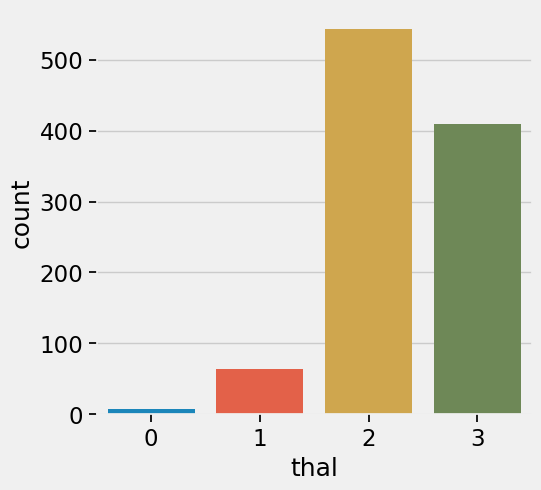

In [59]:
#Thal
plt.figure(figsize=(5,5))
sns.countplot(x='thal', data=data)
plt.show()

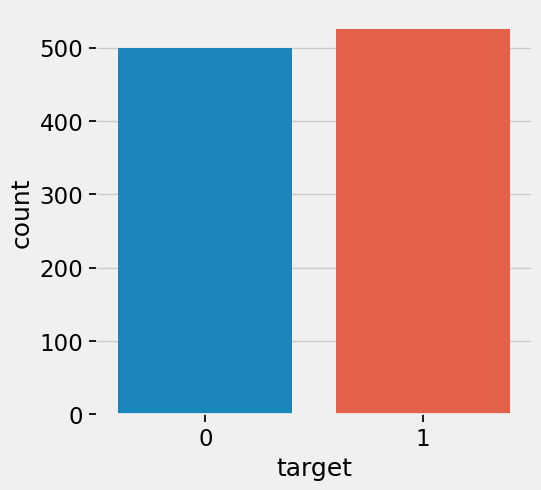

In [62]:
#Finally Heart 
plt.figure(figsize=(5,5))
sns.countplot(x='target', data=data)
plt.show()

In [63]:
#Scale all values for good Accuracy
sc = StandardScaler()
col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[col] = sc.fit_transform(data[col])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [64]:
# Splitting the data  
X = data.drop(["target"], axis = 1)  
y = data["target"]  
  
#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)  

In [72]:
#Training models.
models = [
           KNeighborsClassifier(n_neighbors = 10)
           ,RandomForestClassifier(criterion = 'entropy' , max_depth = 10 , n_estimators = 100) 
           ,SVC(kernel = 'rbf' ,C = 1)
         ]
for i in range(3):
    models[i].fit(X_train, y_train)

In [73]:
#Predict and show the Accuracy & Confutin matrix
for i in range (3):
    y_pred = models[i].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confution matrix for model " f'{models[i]} : \n',cm)
    ac = accuracy_score(y_test, y_pred)
    print("Accuracy score for model " f'{models[i]} : ',ac)
    cr = classification_report(y_test, y_pred)
    print("classification_report for model " f'{models[i]} : \n',cr) 

Confution matrix for model KNeighborsClassifier(n_neighbors=10) : 
 [[129  30]
 [ 23 126]]
Accuracy score for model KNeighborsClassifier(n_neighbors=10) :  0.827922077922078
classification_report for model KNeighborsClassifier(n_neighbors=10) : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       159
           1       0.81      0.85      0.83       149

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308

Confution matrix for model RandomForestClassifier(criterion='entropy', max_depth=10) : 
 [[159   0]
 [  3 146]]
Accuracy score for model RandomForestClassifier(criterion='entropy', max_depth=10) :  0.9902597402597403
classification_report for model RandomForestClassifier(criterion='entropy', max_depth=10) : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
      

In [74]:
#Use Ramdomforest (best accuracy score) for creating a prediction column 
y_pred = models[1].predict(X_test)
X_test['predictions'] = y_pred 

In [77]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predictions
527,0.834359,0,0,-0.434752,-0.717508,0,1,0.603877,0,-0.912329,2,0,2,1
359,-0.158157,0,2,-0.206287,-0.581764,0,0,-1.483579,0,-0.912329,2,0,0,1
447,0.062402,1,0,1.621431,0.833861,0,0,-0.178919,1,-0.231177,1,1,3,0
31,-0.488996,0,1,-0.663216,-0.038784,0,1,0.560389,0,0.024256,2,0,2,1
621,-0.709555,1,0,-0.092055,0.193921,1,0,0.038525,1,-0.912329,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,-2.804866,1,1,-0.092055,-0.814469,0,0,2.299935,0,-0.912329,2,0,2,1
239,0.834359,0,0,1.050269,-0.038784,0,1,0.212479,1,0.279688,1,0,2,0
312,1.716595,1,2,1.621431,0.446019,0,1,-1.614045,1,1.556849,1,1,3,0
211,1.385757,1,0,-1.805540,1.027782,0,0,-1.048692,1,-0.146032,1,2,2,0
